In [1]:
import psutil
import sys
from itertools import islice
from collections import defaultdict
import string
import unicodedata
from multiprocess import Pool
import pickle
import random 
random.seed(1234)


In [68]:
def read_first_n_lines(n):
    with open("bookcorpus_small.txt", 'r') as file:
        return list(islice(file, n))
    
# read in 3000000 sentences from the txt file
text = read_first_n_lines(3000000)
text = [line.strip() for line in text]
print(f"Number of sentences in reduced corpus: {len(text)}")

Number of sentences in reduced corpus: 3000000


#### Remove sections that are not relevant for language modeling, such as isbn numbers, URLs, etc

In [105]:
import re

In [225]:
text_clean = []
for s in text:
    s = s.replace("... ...", "")
    s = s.replace("==", "")
    s = s.replace("/", " / ")

    match = re.search(r'\d\d:\d\d:\d\d', s) or re.search(r'\d:\d\d:\d\d', s) or re.search(r'\.[a-z]', s)  # exclude sentences containing time strings of the form 'xx:xx:xx' where x is a number and words that are prefixed by "."

    if match or "www." in s or "http" in s or "isbn" in s or "@" in s or "^" in s or "#" in s or "~" in s or ">" in s or "<" in s or "{" in s or "}" in s or "all rights reserved" in s or "[" in s or "]" in s or  "the time element" in s or 'xxxx' in s or 'zzzz' in s or '|' in s:
        continue
    else:
        text_clean.append(s)

text = text_clean     
print(f"Number of clean sentences: {len(text)}")

Number of clean sentences: 2980937


#### Remove lines containing chapter headings

In [226]:
text_clean = []
for s in text:
    if "chapter 1" in s or "chapter 2" in s or "chapter 3" in s or "chapter 4" in s or "chapter 5" in s or "chapter 6" in s or "chapter 7" in s or "chapter 8" in s or "chapter 9" in s or "copyright" in s:
        continue
    else:
        text_clean.append(s)

text = text_clean     
print(f"Number of clean sentences: {len(text)}")

Number of clean sentences: 2980937


In [227]:
idx = []
for i,s in enumerate(text):
    if "/" in s:
    #match = re.search(r'\.\.[a-z]', s) 
    #match = re.search(r'\.[a-z]', s) 
    #if match:
        idx.append(i)
print(len(idx))        

1236


In [228]:
for i in idx:
    print(i, text[i])

3509 not in a dream / vision .
5208 they 're with him almost 24 / 7 . ''
5335 noah glanced over to see his tour guide / friend staring at them in the rearview mirror , jaw hanging , eyes still hidden behind the glasses .
6701 it 's not because i 'm plotting to fly the thing into a building like 9 / 11 . ''
8941 the contents of gabriel 's tool boxes were sprawled across the dusty black tile of the floor , signs that a madman / half-genius had been at work , putting together things from raw ingredients with the inspiration of an artist .
11704 take an unlikely main character , a scarily probable conspiracy , a government run amok , cocaine dealers , commandos , whores , a burro , and a tightly meshed action / intrigue plot , and you have what to me is the most original thriller of the year .
11708 semi-used `` okay , im from the other side of the pond ( you can find most of my reviews and on the uk site ) and im not a patient / forgiving reader if the writer confuses me or dawdles in the

In [6]:
# pre-tokenization into words
'''
text_pretokenized = []
for s in text:
    pre_tokens = s.split()
    text_pretokenized.append(pre_tokens)

text = text_pretokenized
'''

In [7]:
# get sentence word length distributions
word_lens = [len(s) for s in text]
print(f"Total num sequences: {len(word_lens)}")
print(f"Shortest: {min(word_lens)}")
print(f"Longest: {max(word_lens)}")
print(f"Average: {sum(word_lens)/len(word_lens)}")

Total num sequences: 2988927
Shortest: 1
Longest: 883
Average: 13.947795981634881


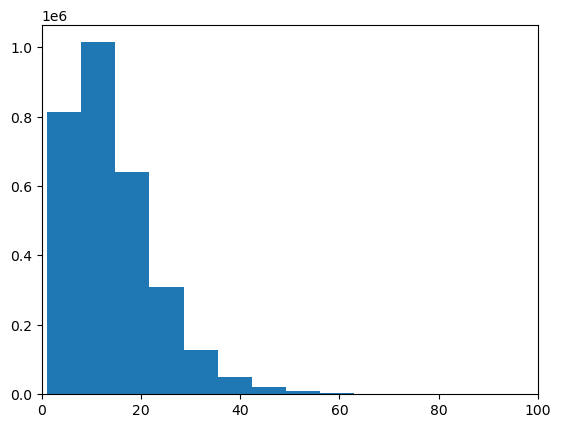

In [8]:
import matplotlib.pyplot as plt

# show histrogram of sequence length distribution
plt.hist(word_lens, bins=128)
plt.xlim(0,100)
plt.show()

In [9]:
# now concatenate all sentences into a single list of words
#text = [word for s in text for word in s]

In [10]:
#print(f"Total words in corpus: {len(text)/1e6 :.2f} M")

In [11]:
# save the preprocessed corpus to file
#with open('word_list_cleaned', 'wb') as file:
#    pickle.dump(text, file)   

#### WordPiece Tokenization

In [234]:
from wordpiece_tokenizer import WordPieceTokenizer
import importlib
import wordpiece_tokenizer
importlib.reload(wordpiece_tokenizer)


# instantiate tokenizer object
tokenizer = WordPieceTokenizer(cleaning=True, max_subword_len=13)

In [235]:
# generate vocabulary
tokenizer.generate_vocab(text, max_vocab_size=2048)
print(tokenizer.vocab)

Building vocab. Current vocab_size --> :  10%|█         | 211/2048 [01:52<30:54,  1.01s/it]

In [ ]:
tokenizer.vocab[1000:]

['hugh',
 'hugh-b',
 'huzz',
 'huzza',
 'huzzah',
 'i',
 "i'k",
 "i'ki",
 "i'kin",
 'if',
 'ijj',
 'ijju',
 'injur',
 'injury',
 'izzy',
 'j',
 'j-j',
 'j-ju',
 'j-jus',
 'j-just',
 'j.',
 'jabb',
 'jaff',
 'jaffa',
 'jazz',
 'jibb',
 'jiff',
 'jiffy',
 'jizz',
 'jj.',
 'jjju',
 'jjjus',
 'jjjust',
 'jobb',
 'jobbi',
 'jobbu',
 'jobbut',
 'jobby',
 'jobj',
 'jobju',
 'jobjus',
 'joff',
 'jr.',
 'ju',
 'ju-j',
 'ju-ji',
 'ju-jit',
 'ju-ju',
 'jugg',
 'juggl',
 'jugh',
 'juju',
 'jujub',
 'jul',
 'juli',
 'july',
 'july-',
 'july-o',
 'july-s',
 'jum',
 'juma',
 'juman',
 'jumanj',
 'jumar',
 'jumars',
 'jumb',
 'jumbl',
 'jumbo',
 'jumbo-',
 'jumo',
 'jumon',
 'jumonv',
 'jump',
 'jung',
 'jungf',
 'jungfr',
 'jungl',
 'jungwh',
 'jur.',
 'jus',
 "jus'",
 "jus't",
 "jus'ta",
 'jus-',
 'jush',
 'jusj',
 'jusju',
 'jusjus',
 'just',
 'k',
 'kabb',
 'kabba',
 'kabbag',
 'kabbal',
 'kaff',
 'kibb',
 'kibbu',
 'kibbut',
 'kiff-',
 'kiff-k',
 'kjur',
 'kjurt',
 'knobb',
 'knobbl',
 'kobb',
 '